# This notebook shows various implementations of plotting of the data

In [44]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

In [8]:
np.random.seed(42)

### Load Iris dataset

In [12]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
class_names = iris.target_names
X.shape, Y.shape, class_names

((150, 4), (150,), array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [25]:
iris_df = pd.DataFrame(X,columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df['species'] = Y
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Plotting distributions of individual features

#### Density plots and histograms

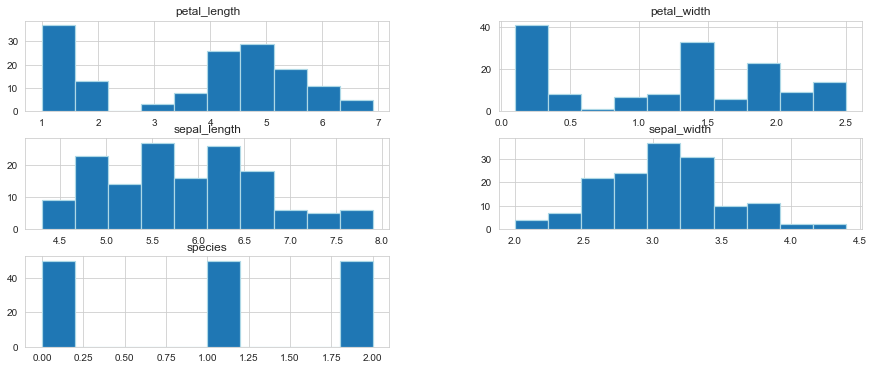

In [63]:
iris_df.hist(edgecolor='lightblue', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(15,6)

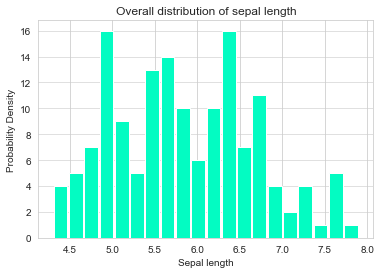

In [71]:
iris_df['sepal_length'].plot.hist(grid=True, bins=20, rwidth=0.9,color='#03fcc2')
plt.title('Overall distribution of sepal length')
plt.xlabel('Sepal length')
plt.ylabel('Probability Density')
plt.grid(axis='y', alpha=0.75)

Text(0, 0.5, 'Probability Density')

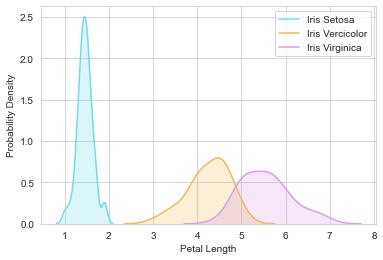

In [72]:
sns.kdeplot(iris_df.loc[(iris_df['species']==0), 'petal_length'], color='#6cdfe6', shade=True, Label='Iris Setosa')
sns.kdeplot(iris_df.loc[(iris_df['species']==1), 'petal_length'], color='#edbc5a', shade=True, Label='Iris Vercicolor')
sns.kdeplot(iris_df.loc[(iris_df['species']==2), 'petal_length'], color='#d89ee6', shade=True, Label='Iris Virginica')
plt.xlabel('Petal Length') 
plt.ylabel('Probability Density') 

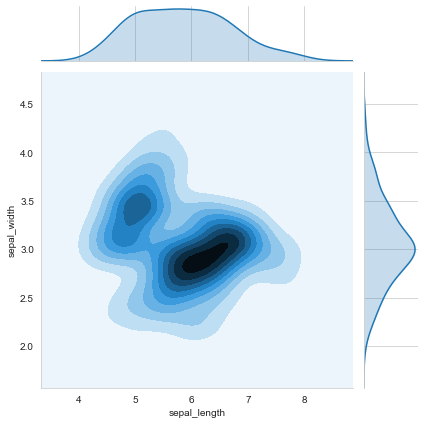

In [73]:
sns.jointplot(x=iris_df['sepal_length'], y=iris_df['sepal_width'], kind="kde")

#### Pairs plots

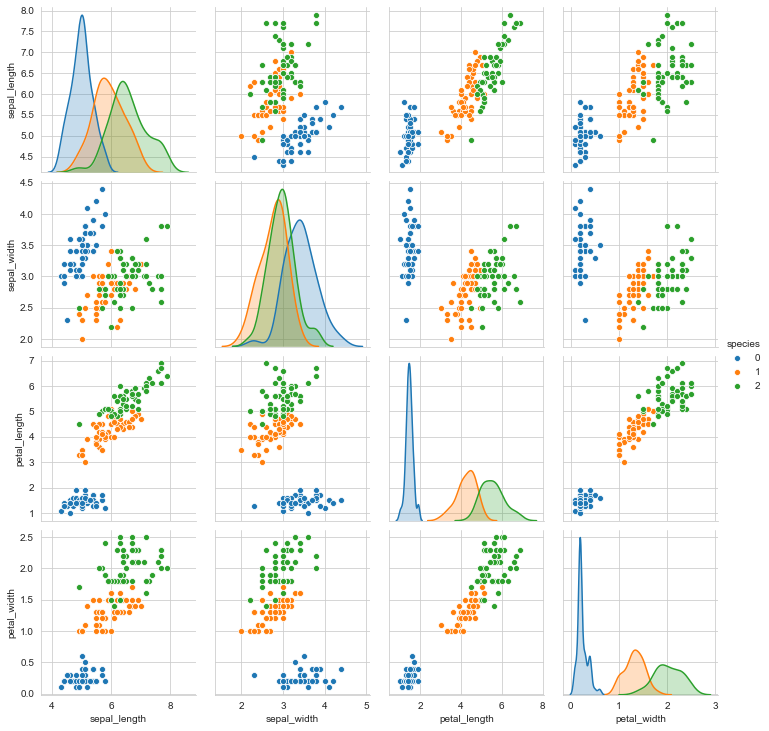

In [51]:
sns.pairplot(iris_df,hue='species');

#### Box plot and variations

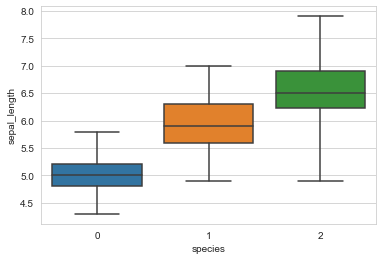

In [75]:
sns.boxplot(x="species", y="sepal_length", data=iris_df, whis=np.inf)

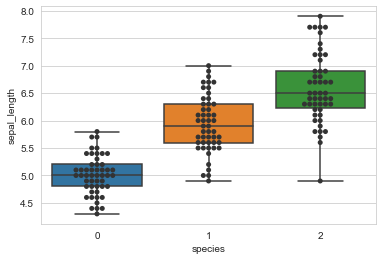

In [76]:
sns.swarmplot(x="species", y="sepal_length", data=iris_df, color=".2")

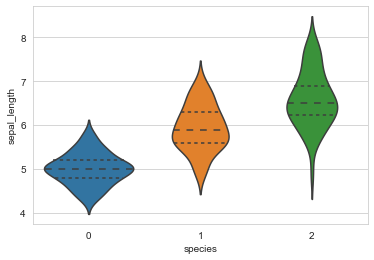

In [80]:
sns.violinplot(x="species", y="sepal_length", data=iris_df, inner="quartile")

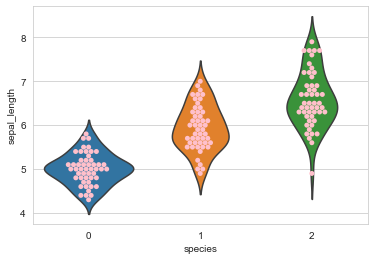

In [79]:
sns.violinplot(x="species", y="sepal_length", data=iris_df, inner=None)
sns.swarmplot(x="species", y="sepal_length", data=iris_df,color="pink", edgecolor="black")

### Principal Component Analysis (PCA)

In [37]:
pca = PCA(n_components=2)   # svd_solverstr {‘auto’, ‘full’, ‘arpack’, ‘randomized’}
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


In [38]:
X_transformed = pca.transform(X)

In [ ]:
# alternatively could just do this:
# X_transformed = pca.fit(X).transform(X)

<Figure size 432x288 with 0 Axes>

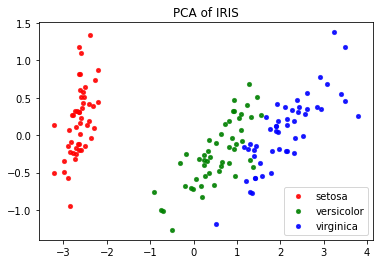

<Figure size 432x288 with 0 Axes>

In [39]:
colors = ['red', 'green', 'blue']
lw = 2

for color, i, class_name in zip(colors, [0, 1, 2], class_names):
    plt.scatter(X_transformed[Y == i, 0], X_transformed[Y == i, 1], color=color, alpha=.8, lw=lw, s=10,
                label=class_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS')
plt.figure()

### Linear Discriminant Analysis (LDA)

In [40]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_transformed = lda.fit(X, Y).transform(X)

<Figure size 432x288 with 0 Axes>

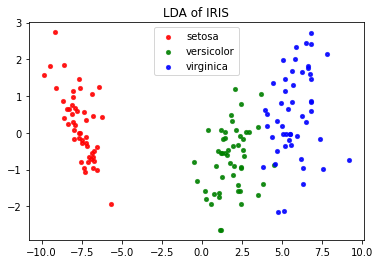

<Figure size 432x288 with 0 Axes>

In [41]:
colors = ['red', 'green', 'blue']
lw = 2

for color, i, class_name in zip(colors, [0, 1, 2], class_names):
    plt.scatter(X_transformed[Y == i, 0], X_transformed[Y == i, 1], color=color, alpha=.8, lw=lw, s=10,
                label=class_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS')
plt.figure()

### t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [42]:
tsne = TSNE(n_components=2, n_iter=1000, random_state=42)
X_transformed = tsne.fit_transform(X)

<Figure size 432x288 with 0 Axes>

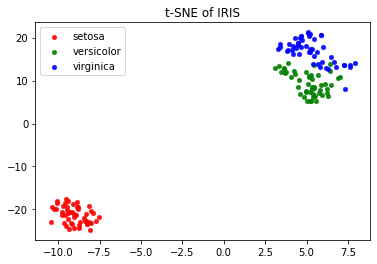

<Figure size 432x288 with 0 Axes>

In [43]:
colors = ['red', 'green', 'blue']
lw = 2

for color, i, class_name in zip(colors, [0, 1, 2], class_names):
    plt.scatter(X_transformed[Y == i, 0], X_transformed[Y == i, 1], color=color, alpha=.8, lw=lw, s=10,
                label=class_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('t-SNE of IRIS')
plt.figure()